# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

lemmatize_data = False

In [185]:
reviews_train_data = pd.read_json('./data/dataset_es_dev.json', lines=True)
reviews_train_data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [186]:
reviews_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         5000 non-null   object
 1   product_id        5000 non-null   object
 2   reviewer_id       5000 non-null   object
 3   stars             5000 non-null   int64 
 4   review_body       5000 non-null   object
 5   review_title      5000 non-null   object
 6   language          5000 non-null   object
 7   product_category  5000 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.6+ KB


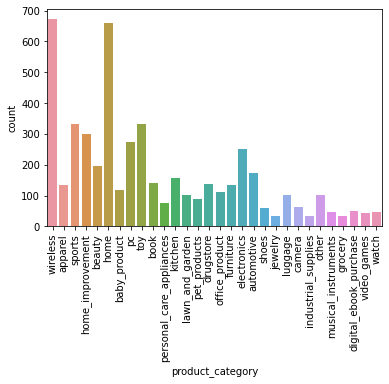

In [187]:
g = sns.countplot(x="product_category", data=reviews_train_data)
plt.xticks(rotation=90)
plt.show()

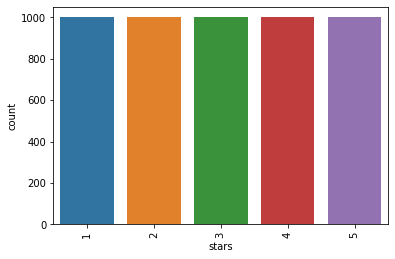

In [188]:
g = sns.countplot(x="stars", data=reviews_train_data)
plt.xticks(rotation=90)
plt.show()

In [189]:
np.random.seed(2021-1-30)
random_index = np.random.randint(reviews_train_data.shape[0])
random_review_body = reviews_train_data.review_body[random_index]
reviews_train_data.iloc[random_index]

review_id                                es_0032321
product_id                       product_es_0562750
reviewer_id                     reviewer_es_0918383
stars                                             1
review_body         No son las canicas de la imagen
review_title                    No son esas canicas
language                                         es
product_category                                toy
Name: 116, dtype: object

In [190]:
import spacy
nlp = spacy.load("es_core_news_sm")

In [191]:
doc = nlp(random_review_body)
print(doc.text)

No son las canicas de la imagen


In [192]:
for sentence in doc.sents:
    print(sentence)

No son las canicas de la imagen


In [193]:
review_body_entities = [(ent.text, ent.label_) for ent in doc.ents]
print(review_body_entities)
spacy.explain("MISC")

[]


'Miscellaneous entities, e.g. events, nationalities, products or works of art'

In [194]:
tokenized_review_body = [token for token in doc]
print(tokenized_review_body)

[No, son, las, canicas, de, la, imagen]


In [195]:
for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    token_explanation = spacy.explain(token_pos)
    print(f"{token_text:<13}{token_pos:<10}{token_dep:<10}{token_explanation}")

No           ADV       advmod    adverb
son          VERB      cop       verb
las          DET       det       determiner
canicas      NOUN      ROOT      noun
de           ADP       case      adposition
la           DET       det       determiner
imagen       NOUN      nmod      noun


In [196]:
for token in doc:
    if token.is_stop or token.is_punct:
        continue
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    token_lemma = token.lemma_
    token_explanation = str(spacy.explain(token_pos))
    print(f"{token_text:<13}{token_lemma:<13}{token_pos:<10}{token_dep:<10}{token_explanation}")

canicas      canica       NOUN      ROOT      noun
imagen       imagen       NOUN      nmod      noun


In [197]:
# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(f"{ent.text}\n{ent.label_} ({spacy.explain(ent.label_)})")

In [198]:
def is_valid_token(token, min_word_length=4, exceptions=[]):
    has_min_length = len(token.lemma_) >= min_word_length
    is_exception = token.text.lower() in exceptions
    return (not token.is_stop and not token.is_punct and has_min_length) or is_exception
    
def lemmatize_text(text):
    doc = nlp(text.lower())
    lemmatized_words = [token.lemma_ for token in doc if is_valid_token(token, exceptions=['no'])]
    return " ".join(lemmatized_words)    

lemmatize_text(random_review_body)

'no canica imagen'

In [199]:
lemmitized_reviews_train_data = None

if lemmatize_data:
    lemmitized_reviews_train_data = reviews_train_data.copy()[['review_body', 'review_title', 'stars']]
    print('Body process:', end=" ")
    %time lemmitized_reviews_train_data.review_body = lemmitized_reviews_train_data.review_body.apply(lemmatize_text)
    print('Title process:', end=" ")
    %time lemmitized_reviews_train_data.review_title = lemmitized_reviews_train_data.review_title.apply(lemmatize_text)
    lemmitized_reviews_train_data.to_csv('./data/lemmitized-data.csv', index=False)
    lemmitized_reviews_train_data.head()

Body process: Wall time: 56.3 s
Title process: Wall time: 34.4 s


In [200]:
pd.read_csv('./data/lemmitized-data.csv')

,review_body,review_title,stars
0,malisimo grande aparatoso protector pantalla,malo comprar,1
1,no recibir pedir no devolución,no recibir,1
2,buscar sistema no funcionar abrazadera agarrar...,no apretar manillar,1
3,utilizar broca menor diámetro doblar mantequil...,broca mantequilla,1
4,no gustar olor viejo aspecto malo,no gustar,1
...,...,...,...
4995,encantar cesta llegar impecable.tiene tamaño u...,guadalupe,5
4996,desempeñar función correctamente,calidad preciar,5
4997,encantar diadema flor venir imagen no venir ap...,excelente,5
4998,gustar fundir fundir normalmente fino colorir ...,genial,5


In [201]:
# from collections import Counter

# counter = Counter([token.lemma_ for token in doc if not token.is_stop and not token.is_punct and len(token.lemma_) > 3])
# count = pd.DataFrame.from_dict(counter, orient="index")\
#                     .reset_index()\
#                     .rename(columns={'index':'word', 0:'count'})
# count